**Logistic regression** is a supervised machine learning algorithm used for binary classification tasks. It estimates the relationship between a dependent variable and one or more independent variables using a sigmoid function to model probabilities.

For a single independent variable, the logistic regression model is represented as:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$



Where:

* 𝑃(𝑌=1∣𝑋): Probability that the dependent variable 𝑌 equals 1, given the independent variable 𝑋.

* 𝛽0: Intercept term.

* 𝛽1: Coefficient (weight) of the independent variable 𝑋.

When there are multiple independent variables, the logistic regression equation becomes:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$
]
]


Where:

* X1,X2,…,Xn: Independent variables.

* β1,β2,…,βn: Coefficients corresponding to each independent variable.

The sigmoid function ensures the output is between 0 and 1, making it interpretable as a probability. Logistic regression is ideal for problems where the target variable is binary (e.g., 0 or 1, "No" or "Yes").

In [1]:
import pandas as pd
import numpy as np

# Load Dataset

In [2]:
import pandas as pd

data = pd.read_csv("/content/predict_heart_disease.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Check for missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [5]:
# import numpy as np

# data['heartRate'].value_counts()

data.dropna(subset=['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'], how="all", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
data["cigsPerDay"].mode()[0]

0.0

# Data Exploration

In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Handling missing values (if any)

In [8]:
def handle_missing_values(data):

    data["education"].fillna(np.mean(data["education"]), inplace=True)
    data["cigsPerDay"].fillna(data["cigsPerDay"].mode()[0], inplace=True)
    data["BPMeds"].fillna(np.mean(data["BPMeds"]), inplace=True)
    data["BMI"].fillna(np.mean(data["BMI"]), inplace=True)
    data["heartRate"].fillna(np.mean(data["heartRate"]), inplace=True)
    data["glucose"].fillna(np.mean(data["glucose"]), inplace=True)

cleaned_data_missing = handle_missing_values(data)

<ipython-input-8-3c32af61c707>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["education"].fillna(np.mean(data["education"]), inplace=True)
<ipython-input-8-3c32af61c707>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# Removing Duplicates

In [9]:
def remove_duplicates(data):
    data.dropna(subset=['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'], how="all", inplace=True)

cleaned_data_duplicates = remove_duplicates(data)

# Define the Sigmoid Function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


In [12]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))


In [13]:
# Test Case
z = np.array([-500, -1, 0, 1, 500])
expected_output = np.array([7.124576e-218, 0.268941, 0.5, 0.731059, 1.0])

output = sigmoid(z)

assert np.allclose(output, expected_output, atol=1e-6), f"Output mismatch. Got {output}"
print("Sigmoid test passed!")

Sigmoid test passed!


In [14]:
# Test Case
z = np.array([-500, -1, 0, 1, 500])
expected_output = np.array([7.124576e-218, 0.268941, 0.5, 0.731059, 1.0])

output = sigmoid(z)

assert np.allclose(output, expected_output, atol=1e-6), f"Output mismatch. Got {output}"
print("Sigmoid test passed!")

Sigmoid test passed!


# Define the Cost Function



$$
J(\theta) = -\frac{1}{m} \sum \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$


In [15]:
def compute_cost(X, y, weights):
  # print(sigmoid(np.dot(X, weights)))
  a = y * np.log(sigmoid(np.dot(X, weights)))
  b = (1-y) * np.log(1-sigmoid(np.dot(X, weights)))
  cost = (-1 / len(y)) * np.sum(a+b)
  # print(cost)
  return cost

In [16]:
# Test Case
X = np.array([[1, 0.5], [1, 1.5], [1, 2.5]])
y = np.array([0, 1, 1])
weights = np.array([0.1, 0.2])

expected_cost = 1

output_cost = round(compute_cost(X, y, weights))
assert np.isclose(output_cost, expected_cost, atol=1e-5), f"Cost mismatch. Got {output_cost}"
print("Compute cost test passed!")

Compute cost test passed!


# Gradient Descent for Weight Update

### Gradients Computation:
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum (\hat{y} - y) \cdot x_j
$$

### Weights Update:
$$
\theta = \theta - \alpha \cdot \nabla J
$$


In [17]:

def gradient_descent(X, y, weights, learning_rate, epochs, reg_lambda=0.1):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, weights))

        gradient = (1 / m) * np.dot(X.T, (predictions - y)) + (reg_lambda / m) * weights

        weights -= learning_rate * gradient

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost}')

    return weights, cost_history

# Train the Logistic Regression Model

In [18]:

def train_model(X, y, learning_rate=0.01, epochs=1000, reg_lambda=0.1):
    weights = np.zeros(X.shape[1])

    optimal_weights, cost_history = gradient_descent(X, y, weights, learning_rate, epochs, reg_lambda)

    return optimal_weights, cost_history


                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.315630   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.191847   
education        0.017126 -0.163613   1.000000       0.018301    0.007669   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.760239   
cigsPerDay       0.315630 -0.191847   0.007669       0.760239    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.044826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032244   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065046   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.036150   
totChol         -0.070322  0.262131  -0.022614      -0.046562   -0.027008   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088375   
diaBP            0.057933  0.206104  -0.061755      -0.107746   -0.056687   

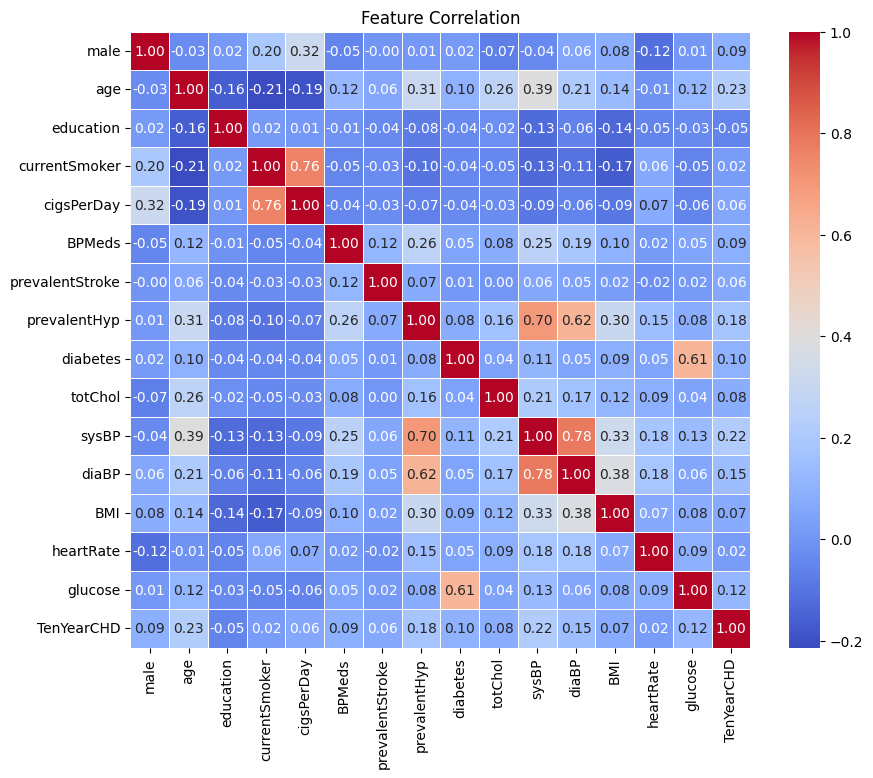

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_stats(df):
  corr_matrix = df.corr()
  print(corr_matrix)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

  plt.title("Feature Correlation")
  plt.show()

show_stats(data)

In [20]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [21]:

X = np.array(data[['cigsPerDay', 'currentSmoker', 'sysBP', 'diaBP']])
y = np.array(data['male'])

# X_train, Y_train = X[:]
# X_test, Y_train =
X.shape
4238 * 80 / 100
X_train, Y_train = X[:3390],y[:3390]
X_test, Y_test = X[3390:], y[3390:]

X_test.shape

(848, 4)

In [28]:
def initialize_weight(X):
  thetas = np.zeros(X.shape[1] + 1)
  return thetas

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def hypothesis(X, thetas):
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    return sigmoid(np.dot(X, thetas))

def Loss_func(X, Y, thetas):
  Y_pred = hypothesis(X, thetas)
  Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
  Loss = np.dot(Y, np.log(Y_pred)) + np.dot(1-Y, np.log(1 - Y_pred))
  return -1/X.shape[0] * np.sum(Loss)

def derivative(X, Y, thetas):
  Y_pred = hypothesis(X, thetas)
  error = Y_pred - Y
  X = np.hstack((X, np.ones((X.shape[0], 1))))  # Add bias term
  return 1/X.shape[0] * np.dot(X.T, error)

def gradient_descent(X, Y, thetas, epochs, lr):

    for i in range(epochs):
        grads = derivative(X, Y, thetas)
        thetas = thetas - (grads * lr)

        if i%100 == 0:
            loss = Loss_func(X, Y, thetas)
            print("Loss: ", loss)

    return thetas

In [29]:
thetas = initialize_weight(X_train)

hypothesis(X_train, thetas)

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [30]:
def train_model(X_train, Y_train, epochs, lr):

    thetas = initialize_weight(X_train)

    thetas = gradient_descent(X_train, Y_train, thetas, epochs, lr)

    print("thetas", thetas)

    return thetas

thetas = train_model(X_train, Y_train, 1000, 0.0001)

Loss:  0.5010866403095925
Loss:  0.44828781046804334
Loss:  0.44647029538165917
Loss:  0.444895480305795
Loss:  0.44353109206505736
Loss:  0.44234952010532125
Loss:  0.44132692632820314
Loss:  0.4404425949473076
Loss:  0.4396784494235334
Loss:  0.4390186830441135
thetas [ 0.00676131 -0.00069874  0.00833344 -0.03367332 -0.00162784]


In [32]:
def test(X_test, Y_test, thetas):
  X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
  return sigmoid(np.dot(X_test, thetas))

test(X_test, Y_test, thetas)

array([0.15624091, 0.20087297, 0.1432282 , 0.13612444, 0.12563851,
       0.14481849, 0.16301636, 0.10757141, 0.20103942, 0.19703642,
       0.10632886, 0.14324996, 0.33719847, 0.20855687, 0.12622476,
       0.13413692, 0.25502088, 0.19666499, 0.21185796, 0.09145618,
       0.14230773, 0.14666413, 0.18609517, 0.12828316, 0.16027408,
       0.18578739, 0.21578816, 0.1821105 , 0.12160961, 0.21711581,
       0.17226915, 0.17462955, 0.13674622, 0.10174751, 0.16516216,
       0.13811697, 0.15725263, 0.25014108, 0.16326394, 0.13426597,
       0.20518757, 0.14525045, 0.15339112, 0.18900179, 0.22456804,
       0.12837812, 0.14522937, 0.2179985 , 0.15947404, 0.23013431,
       0.2563685 , 0.15722269, 0.2713414 , 0.14613977, 0.12911615,
       0.13353397, 0.14148092, 0.13023545, 0.13913184, 0.14792026,
       0.15058775, 0.15518997, 0.16534282, 0.15625356, 0.11063693,
       0.20161048, 0.15815715, 0.20029898, 0.19881162, 0.19109194,
       0.09644975, 0.28090085, 0.16290002, 0.1770148 , 0.15516

In [33]:
# Inputs
X = np.array([[1, 0.5], [1, 1.5], [1, 2.5]])
weights = np.array([0.1, 0.2])
threshold = 0.5

# Expected predictions
expected_predictions = np.array([1, 1, 1])

# Test
output_predictions = predict(X, weights, threshold)
assert np.array_equal(output_predictions, expected_predictions), f"Prediction mismatch. Got {output_predictions}"
print("Predict function test passed!")

Predict function test passed!
